In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_files(instrument):
    df_frames = []
    path = f"/users/joeybesseling/Documents/Programmeren/Projects/Data/{instrument}/"
    instrument = f"{instrument}"
    depth = 20

    found = True
    i = 10
    while found: # 350-660 # 1 - 880
        try:
            print(path + f"{instrument}_1_{depth}({i}).parquet")
            df = pd.read_parquet(path + f"{instrument}_1_{depth}({i}).parquet")
            df["timestamp"] = pd.to_datetime(df.timestamp)
            df = df.set_index("timestamp", drop = True)
            df = df.drop("Unnamed: 0", axis = 1)
            df_frames.append(df)
            i += 1
        except:
            found = False
    df = pd.concat(df_frames)
    df = df.resample("1s").last()
    return df

df = get_files("BTC-PERPETUAL")

/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(10).parquet
/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(11).parquet
/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(12).parquet


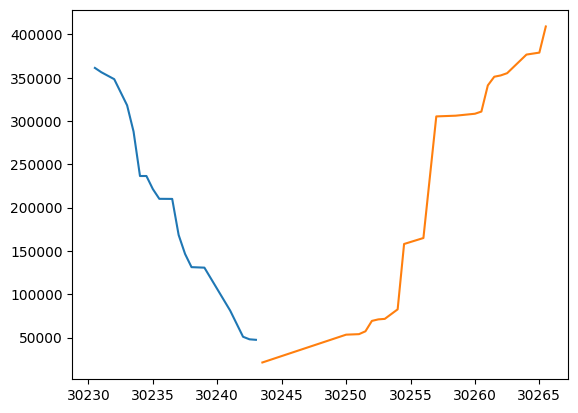

In [19]:
t = -1
test = df.iloc[t].to_numpy()
a = test.reshape(-2,2).transpose()
bids = a[:,a[0] <= np.median(a[0])]
asks = a[:, a[0] > np.median(a[0])]
bids = bids[:, bids[0] != 0]
asks = asks[:, asks[0] != 0]
plt.plot(bids[0], np.cumsum(bids[1]))
plt.plot(asks[0], np.cumsum(asks[1]))
plt.show()

/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(10).parquet
/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(11).parquet
/users/joeybesseling/Documents/Programmeren/Projects/Data/BTC-PERPETUAL/BTC-PERPETUAL_1_20(12).parquet


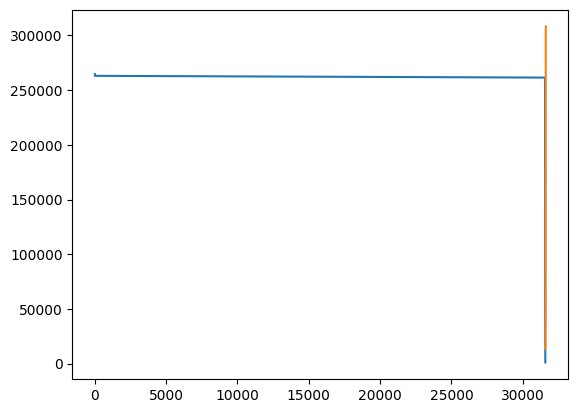

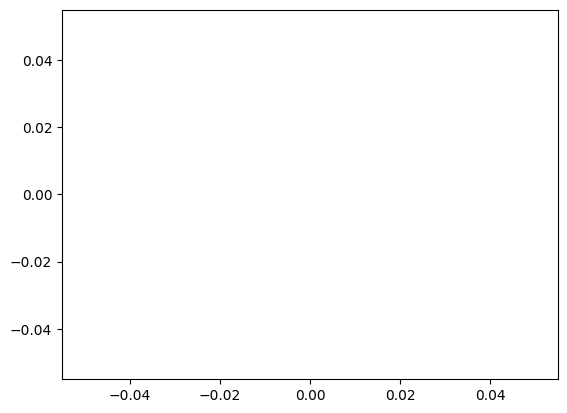

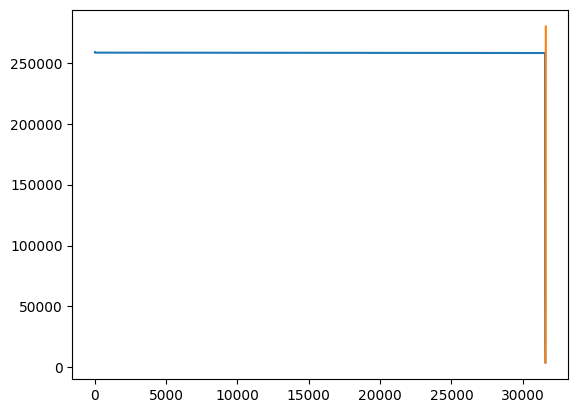

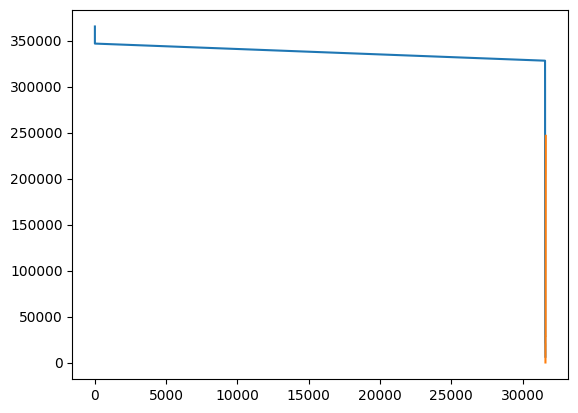

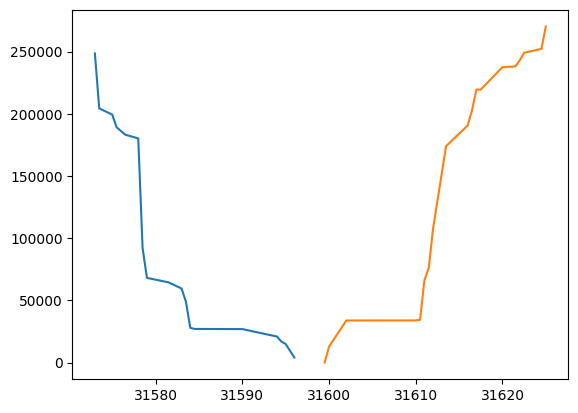

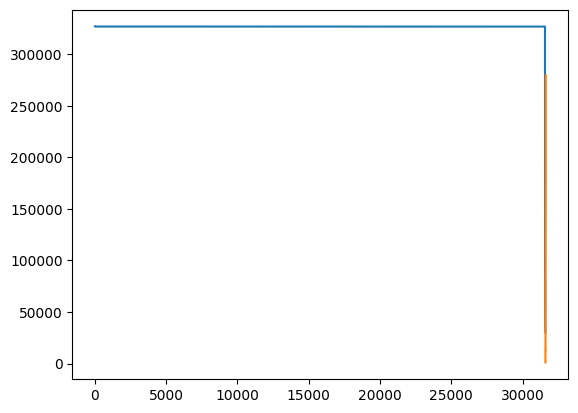

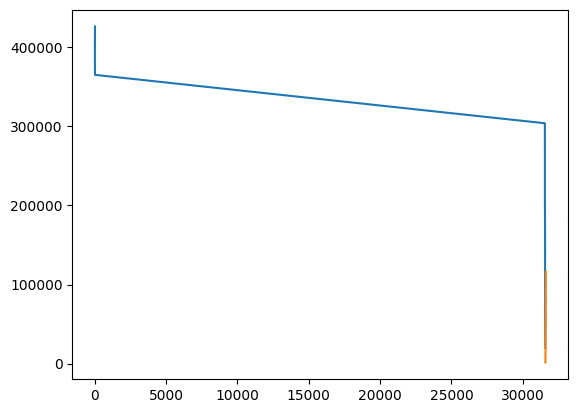

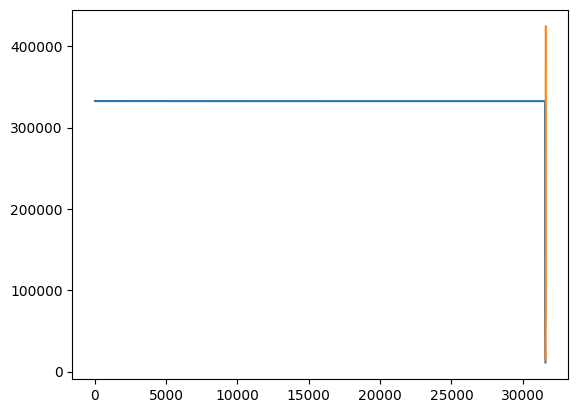

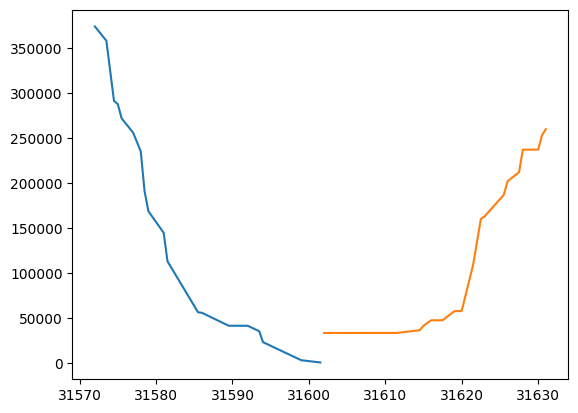

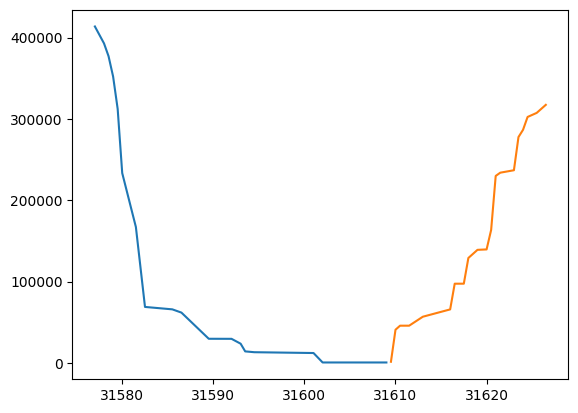

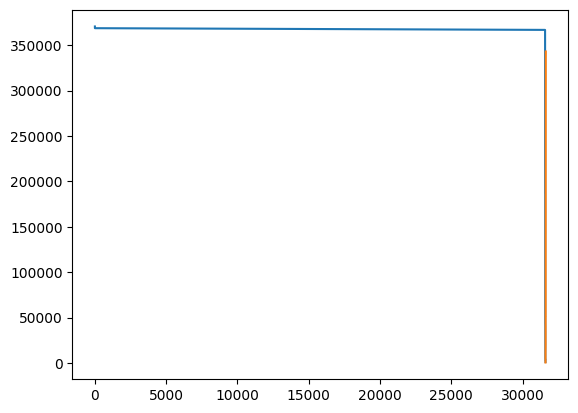

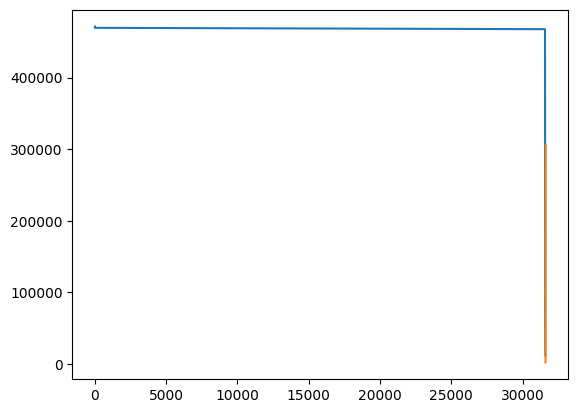

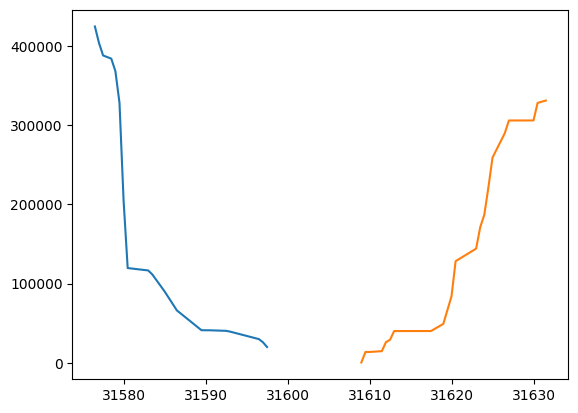

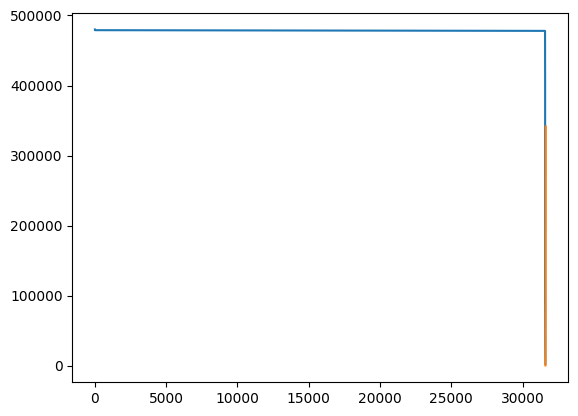

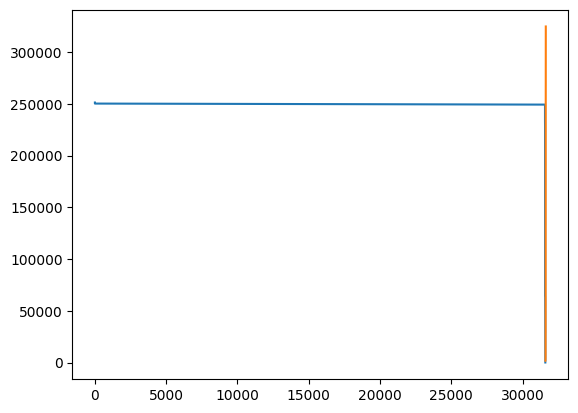

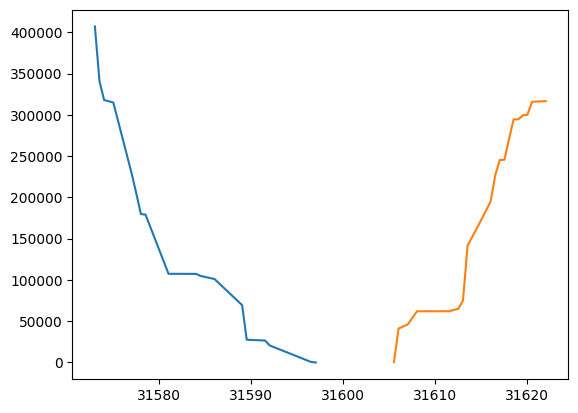

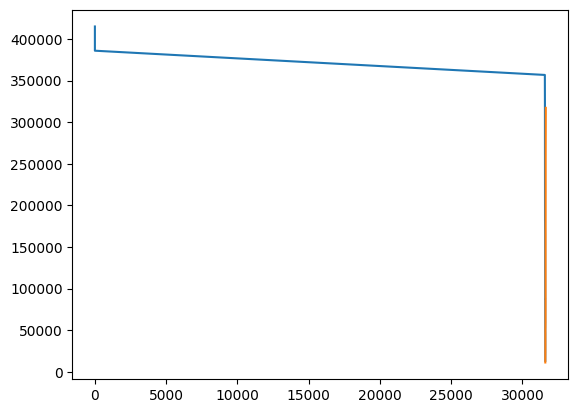

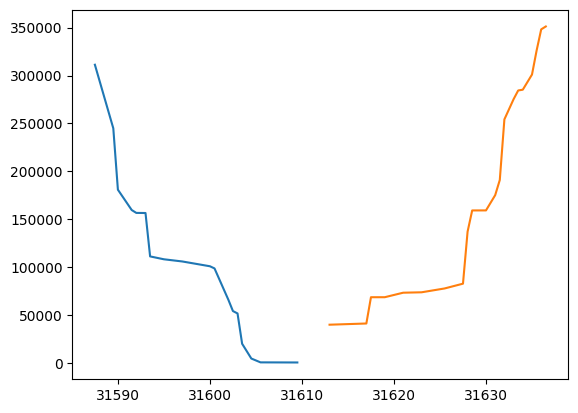

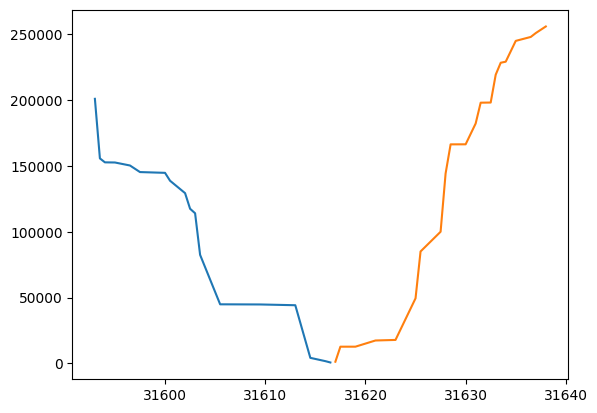

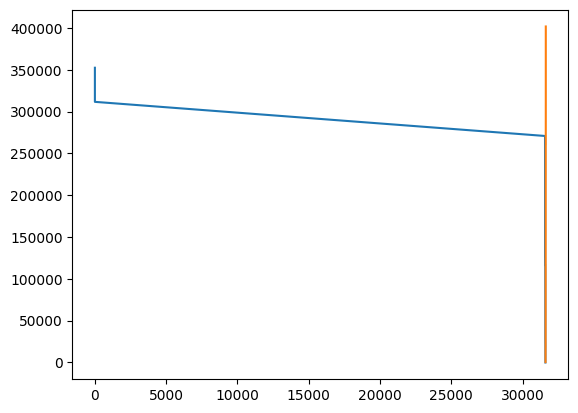

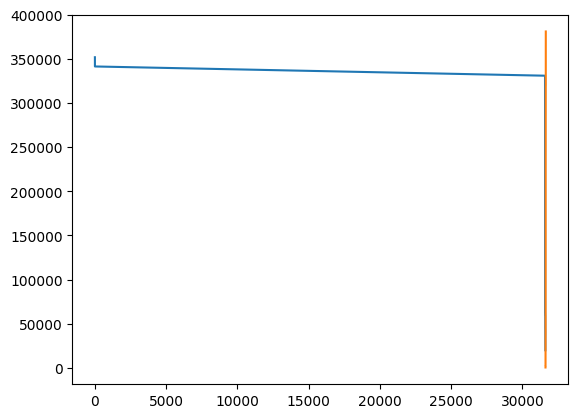

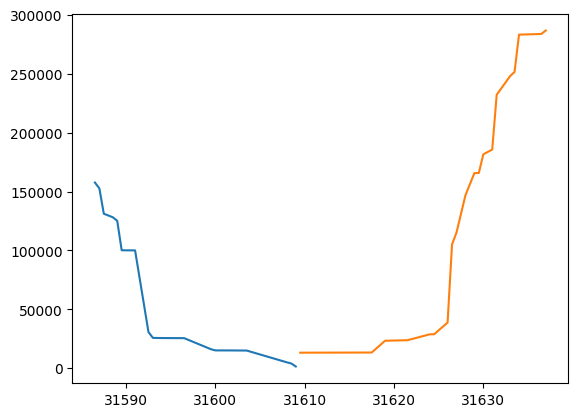

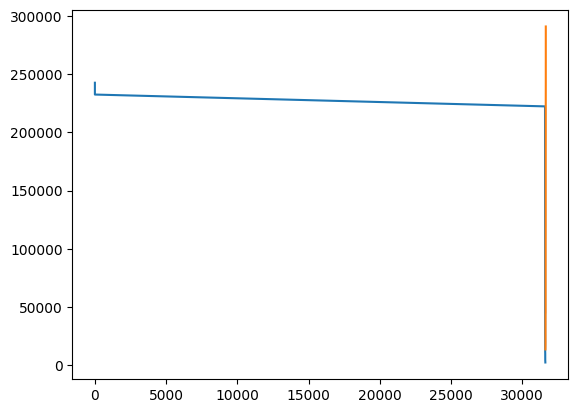

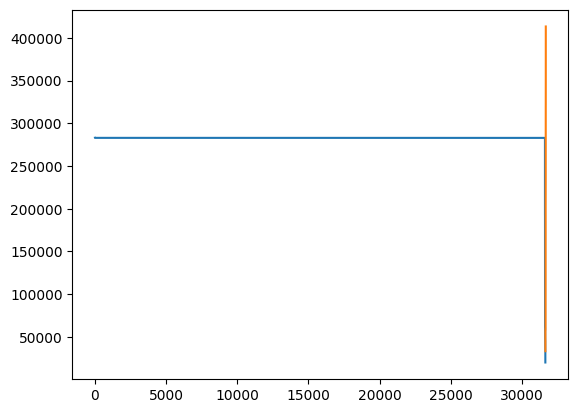

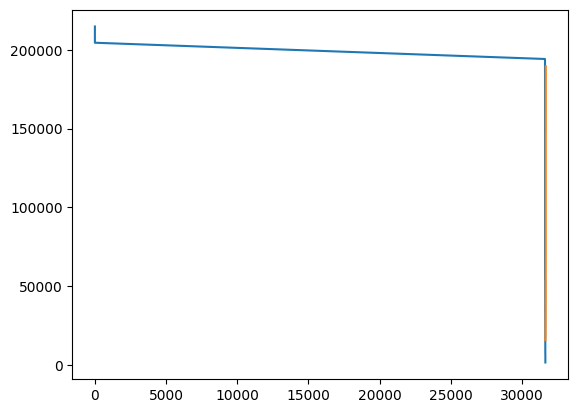

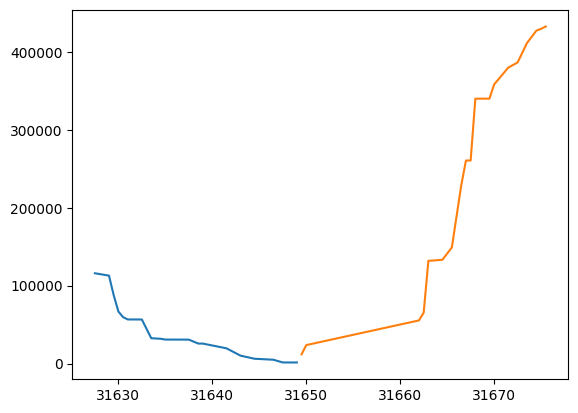

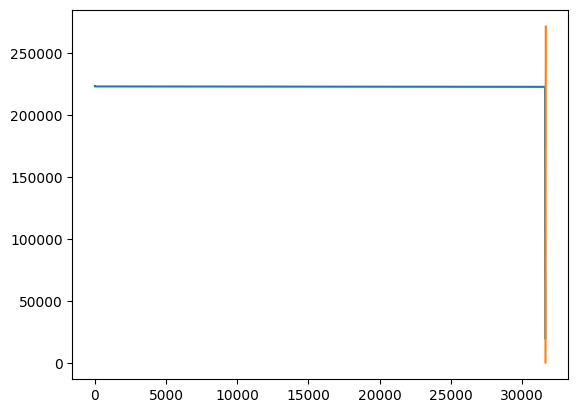

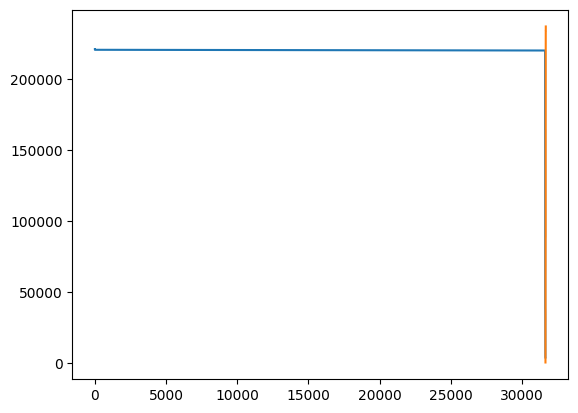

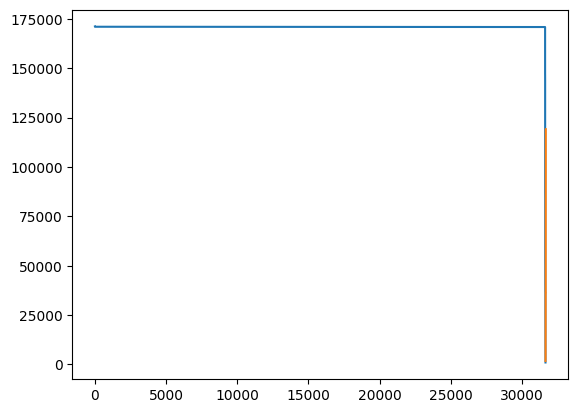

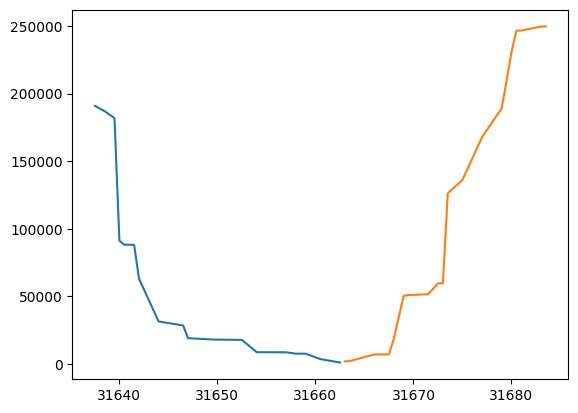

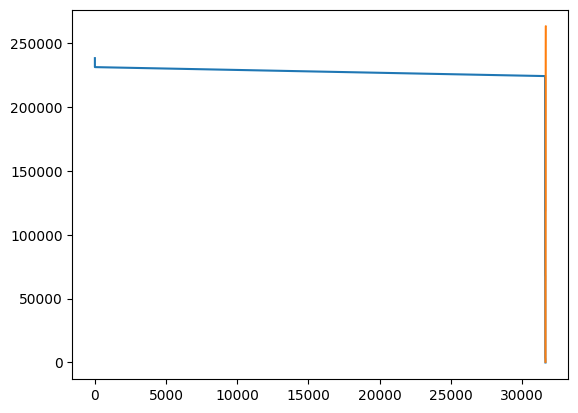

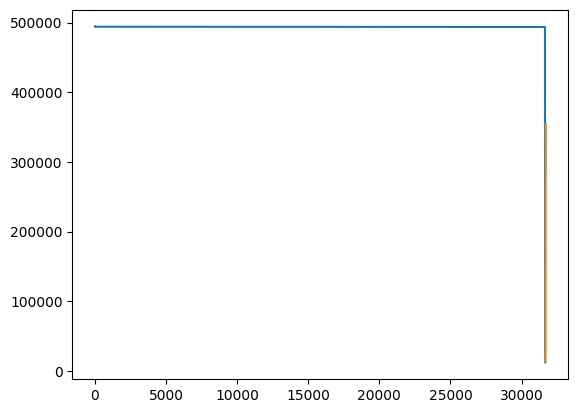

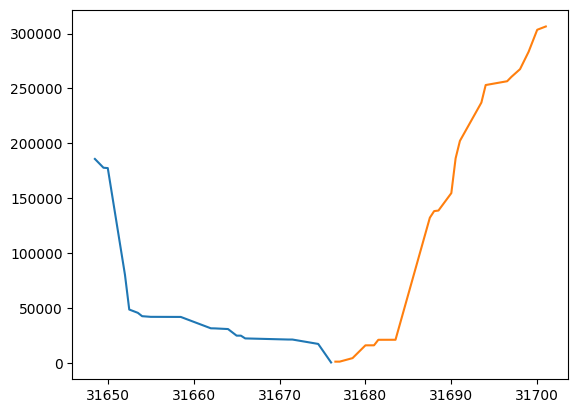

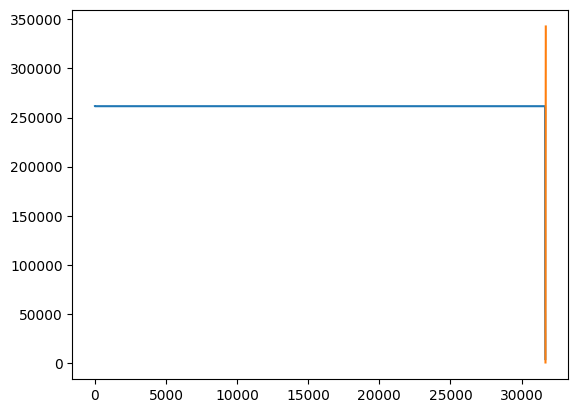

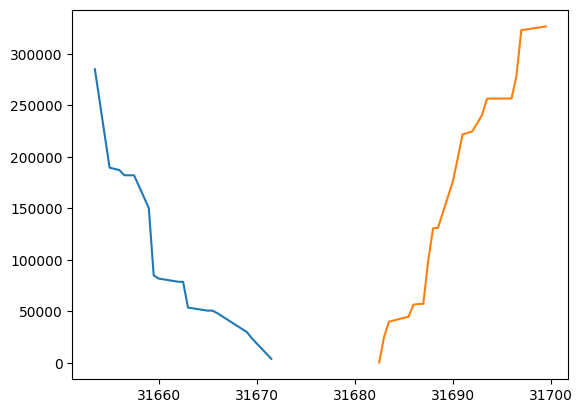

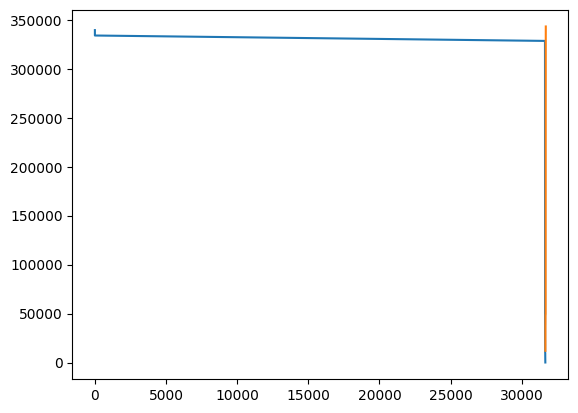

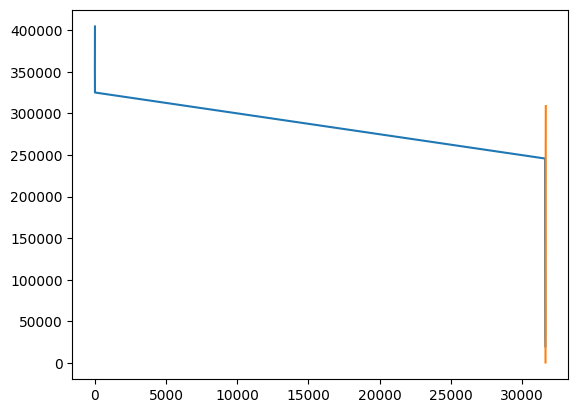

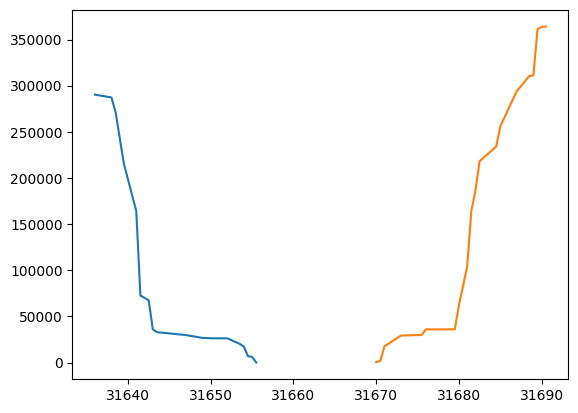

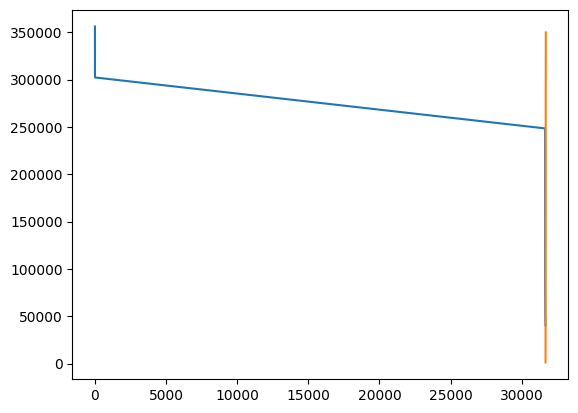

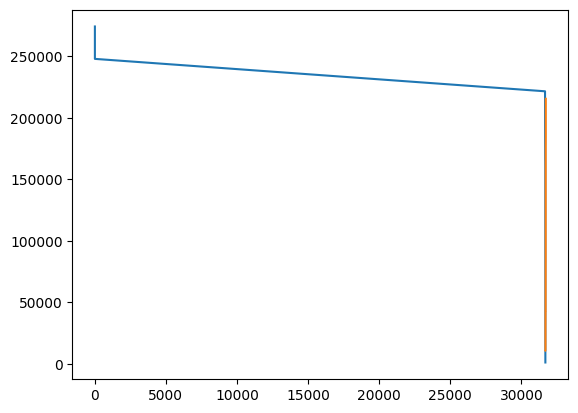

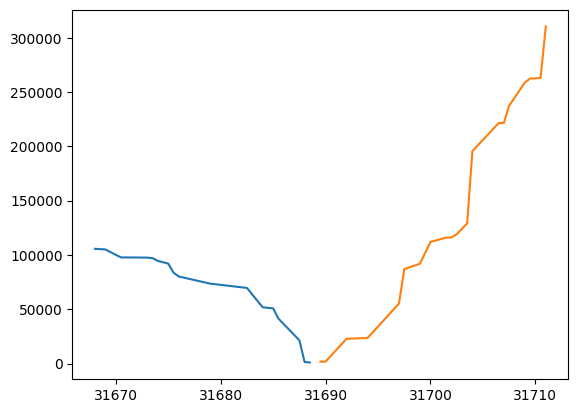

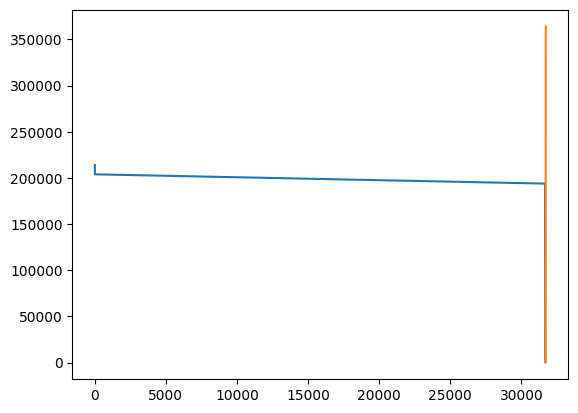

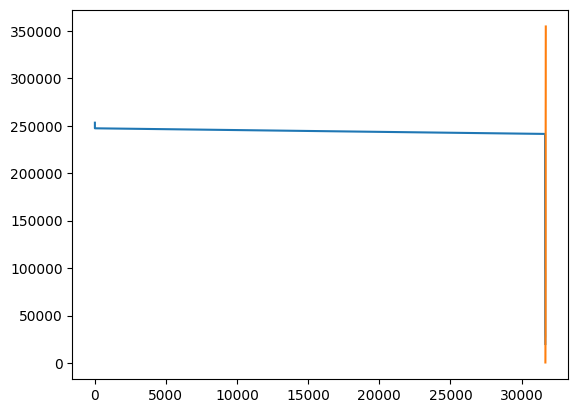

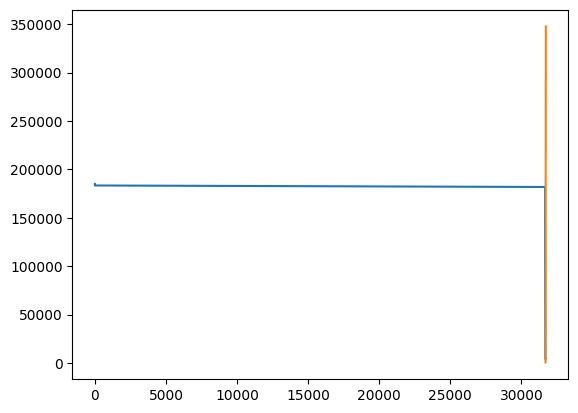

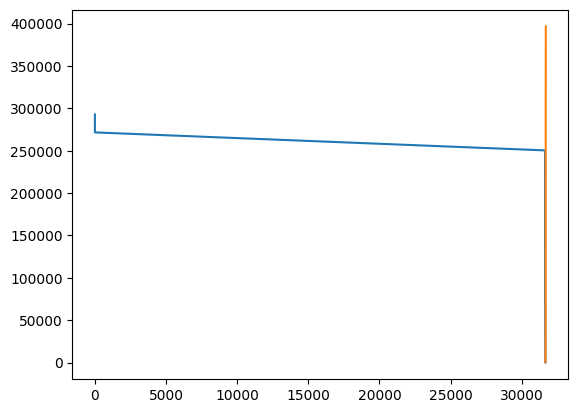

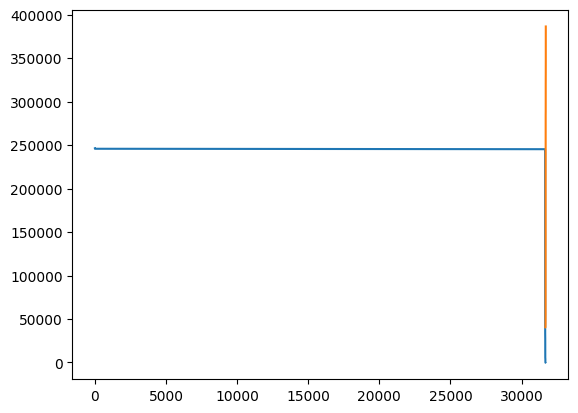

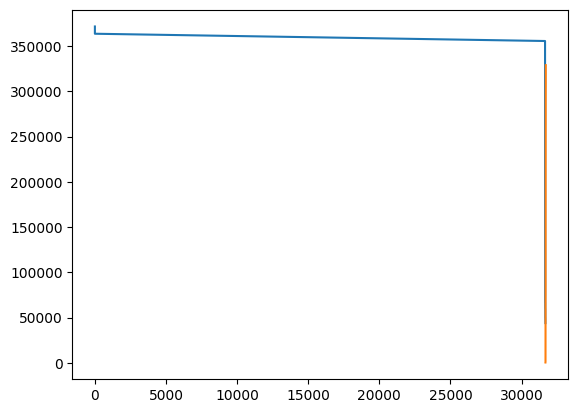

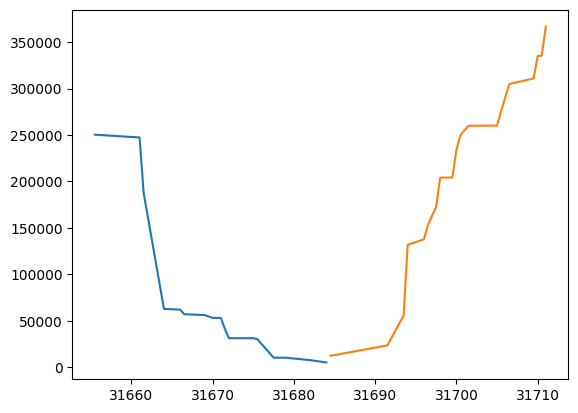

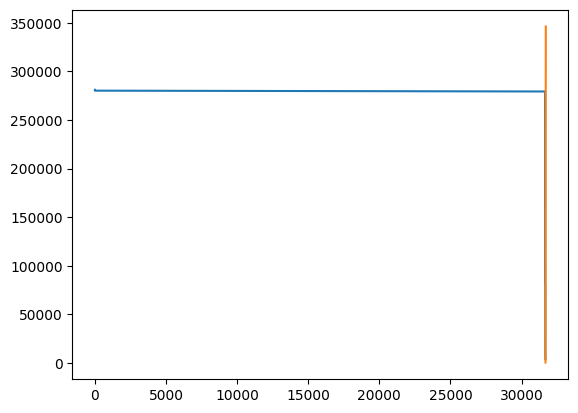

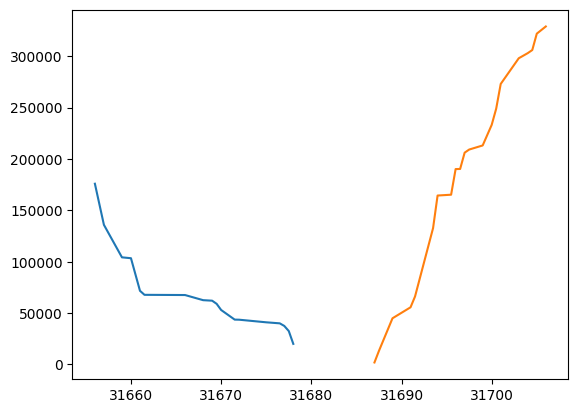

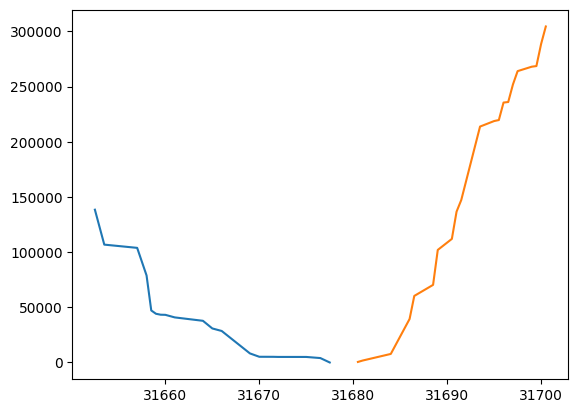

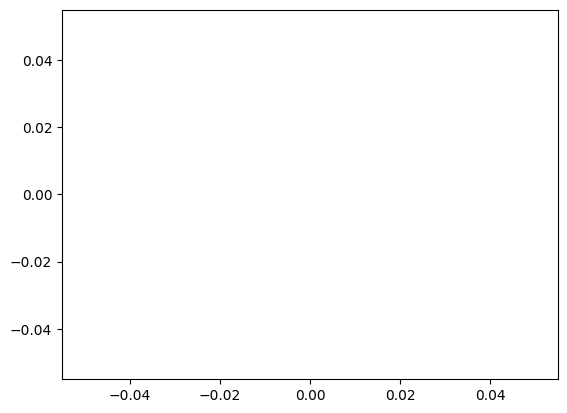

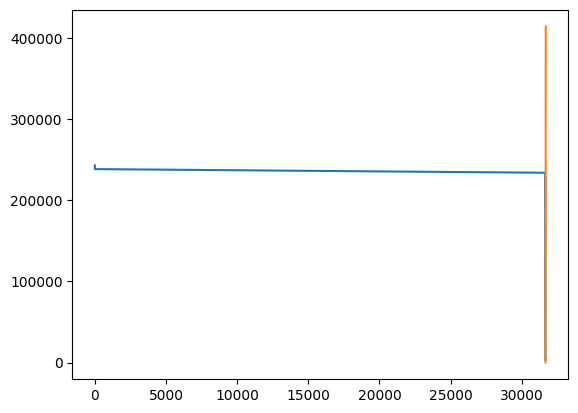

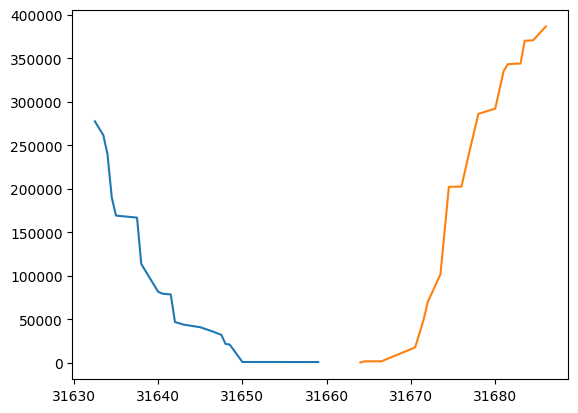

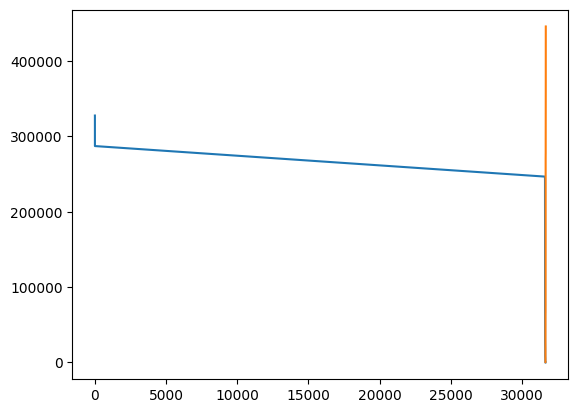

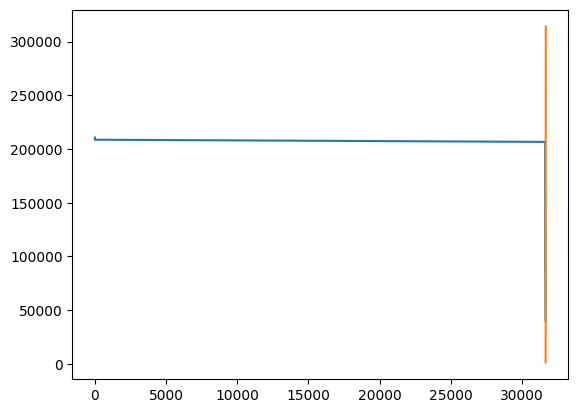

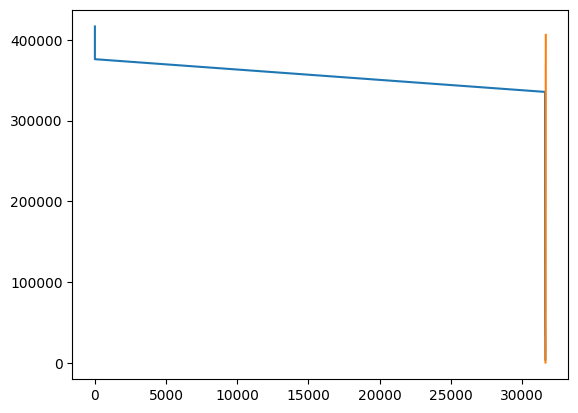

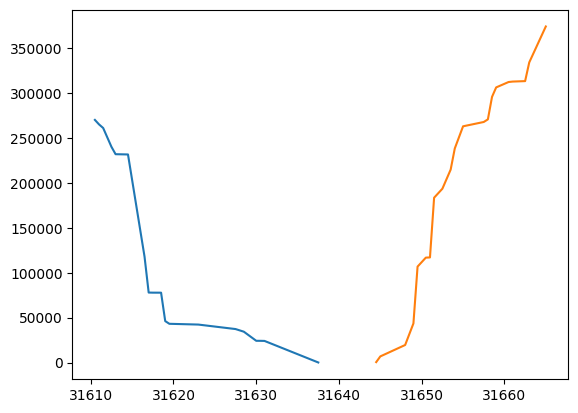

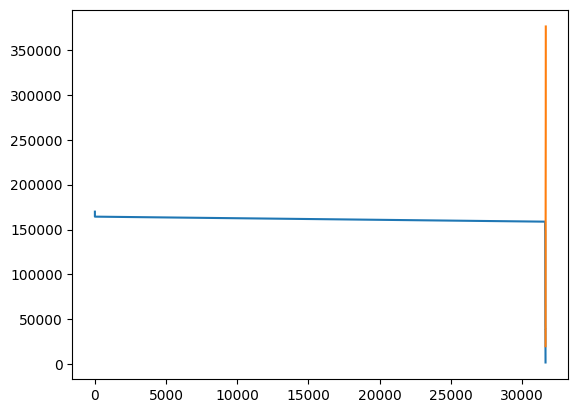

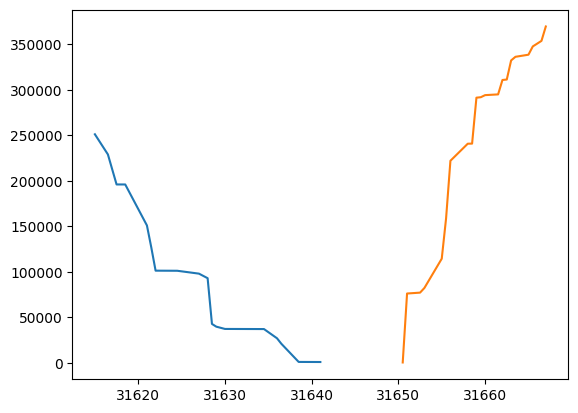

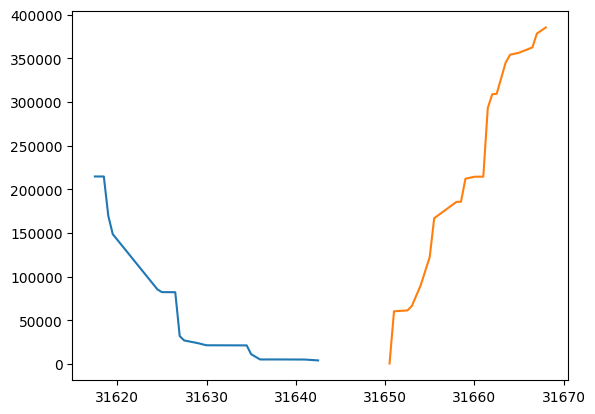

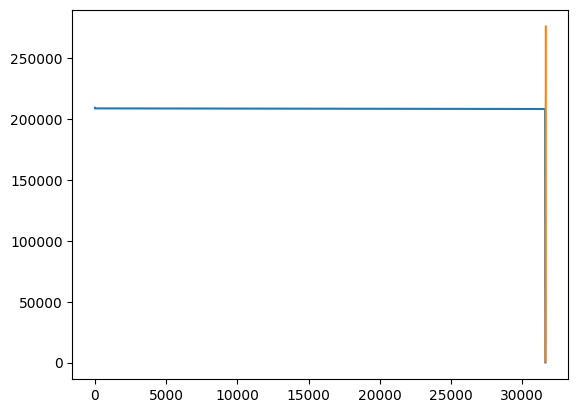

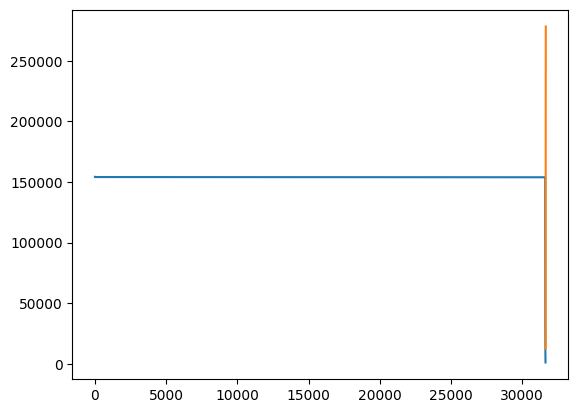

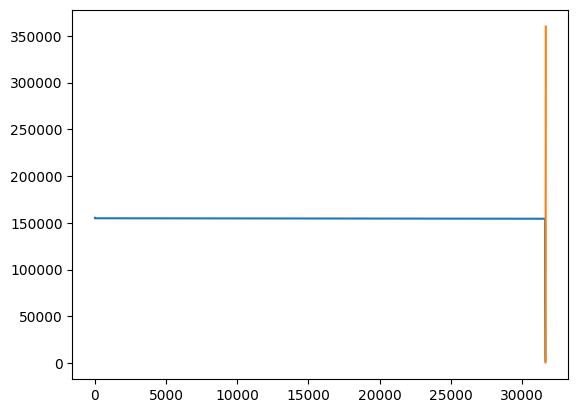

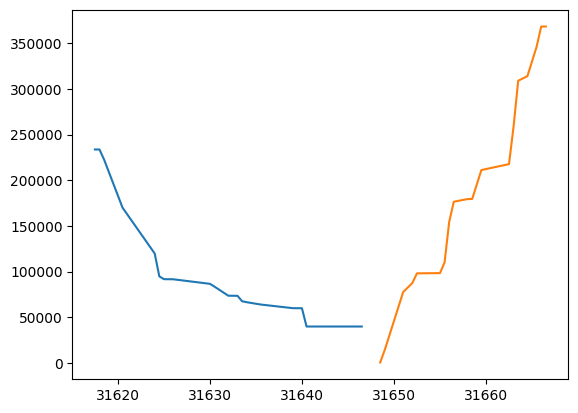

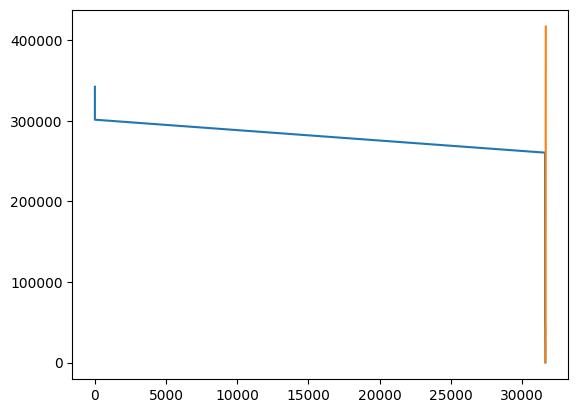

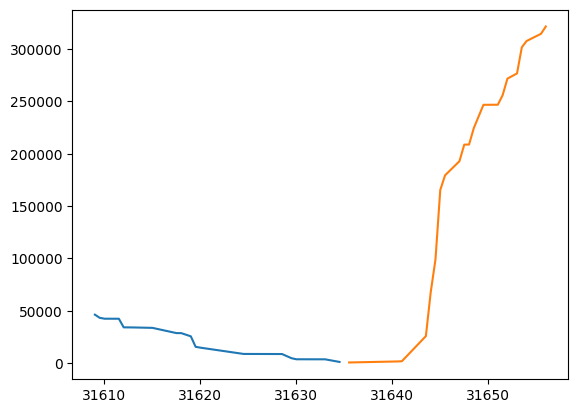

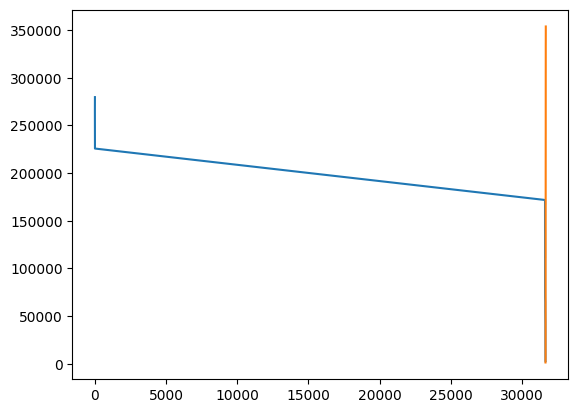

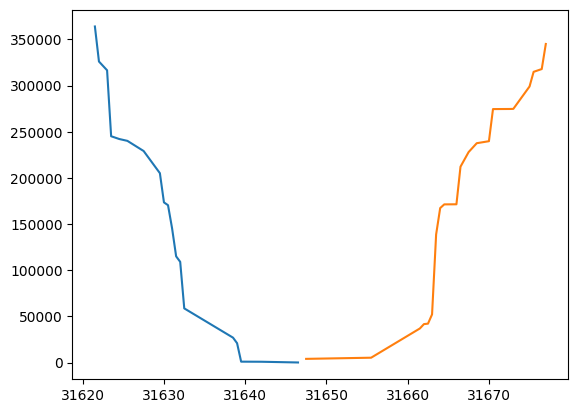

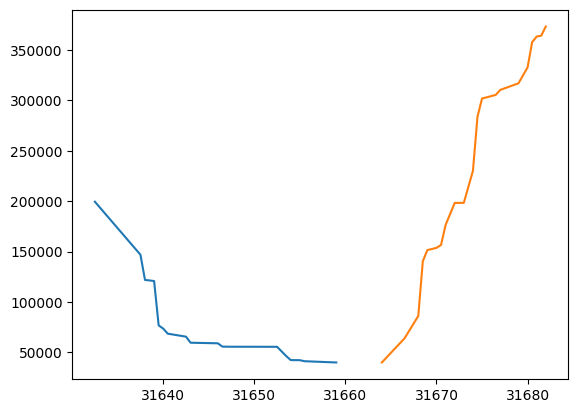

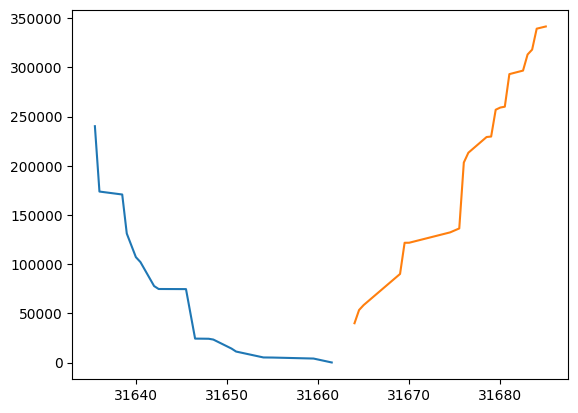

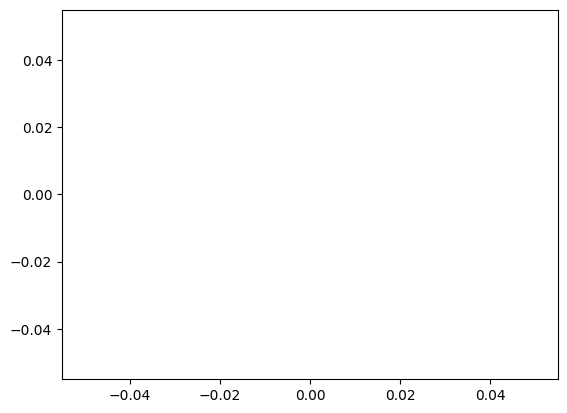

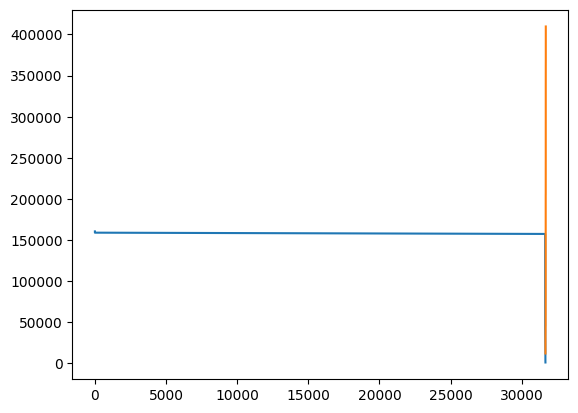

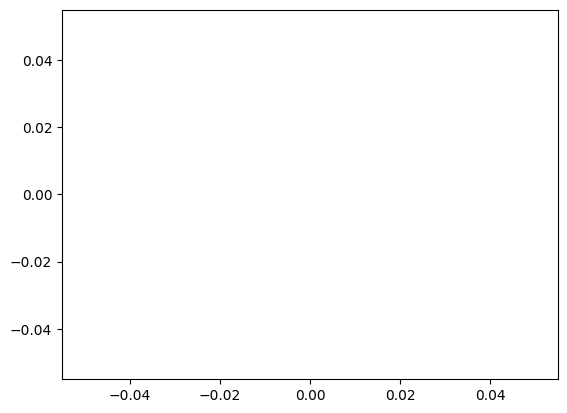

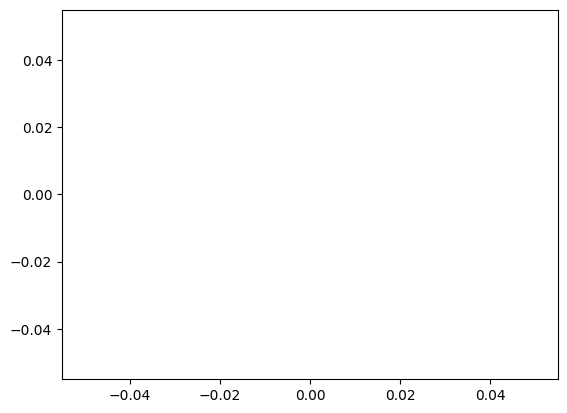

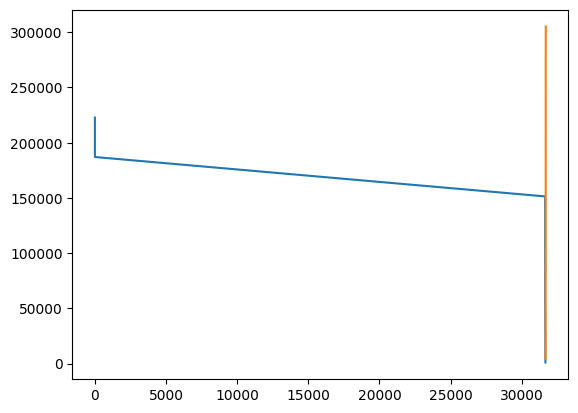

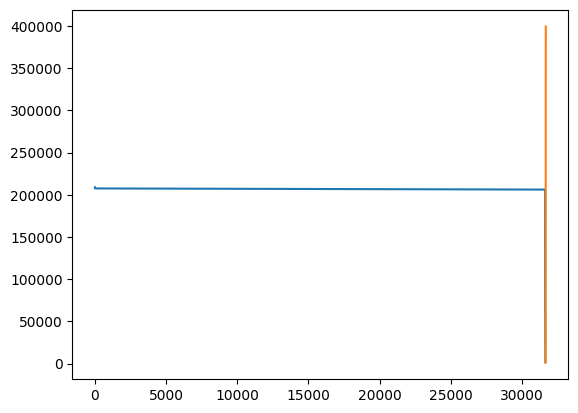

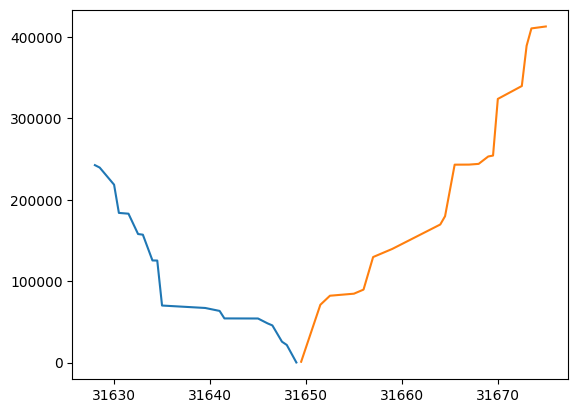

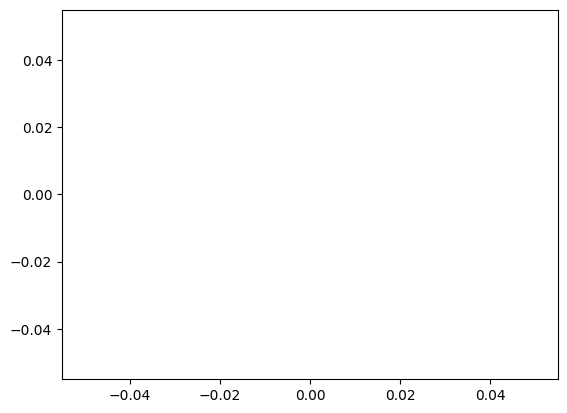

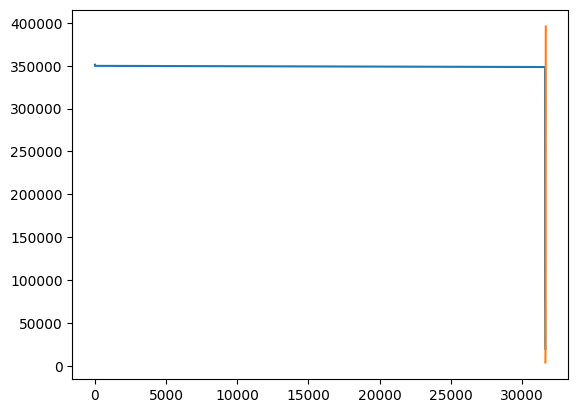

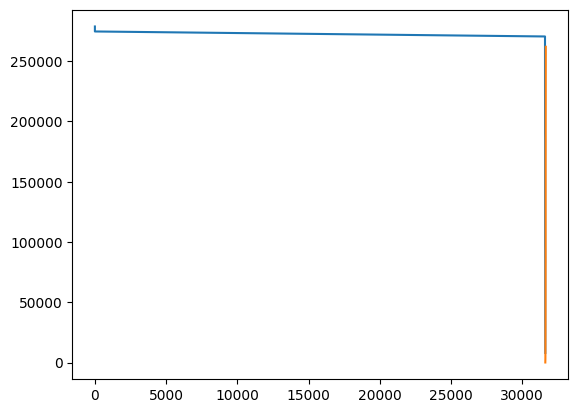

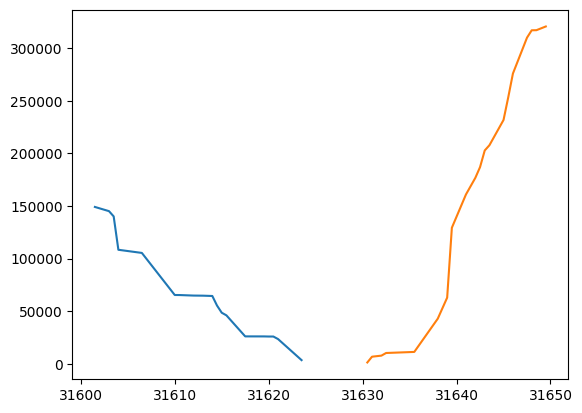

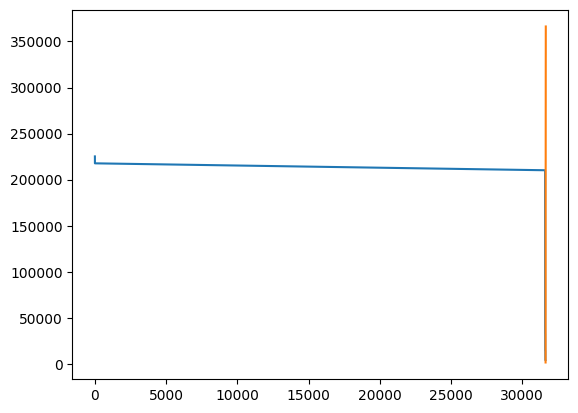

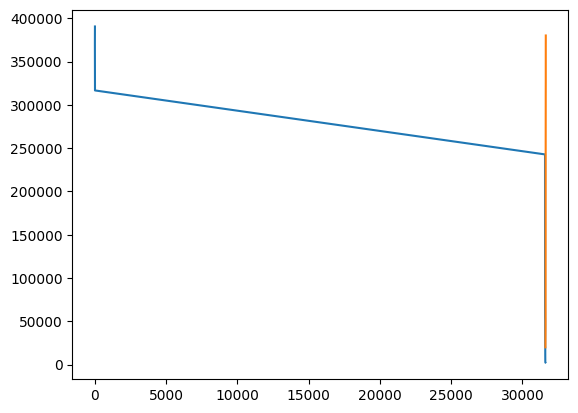

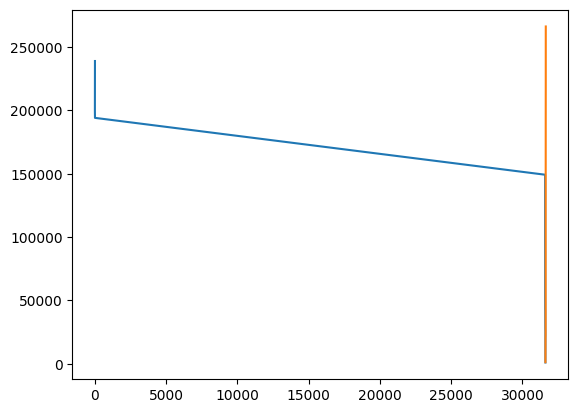

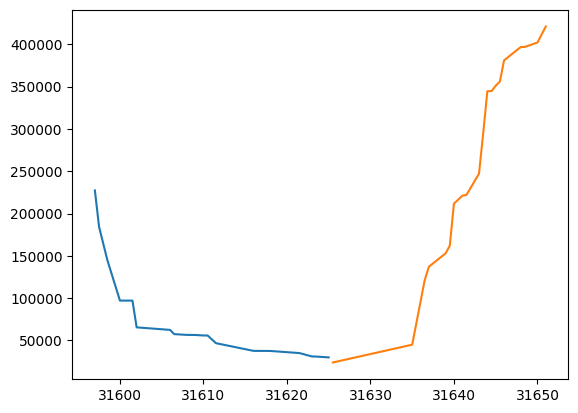

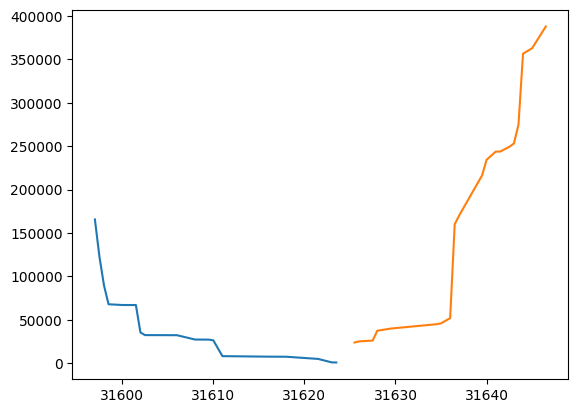

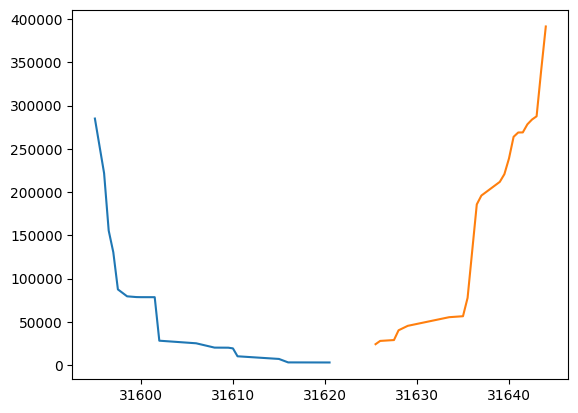

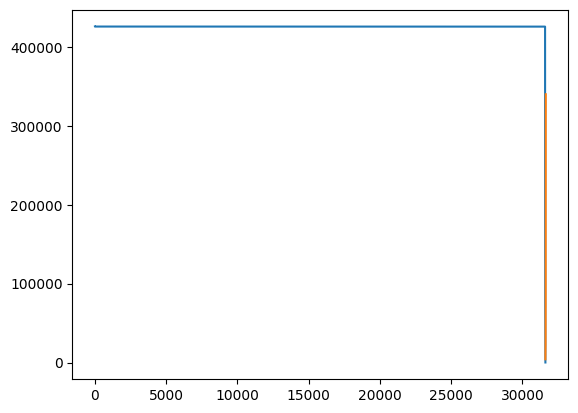

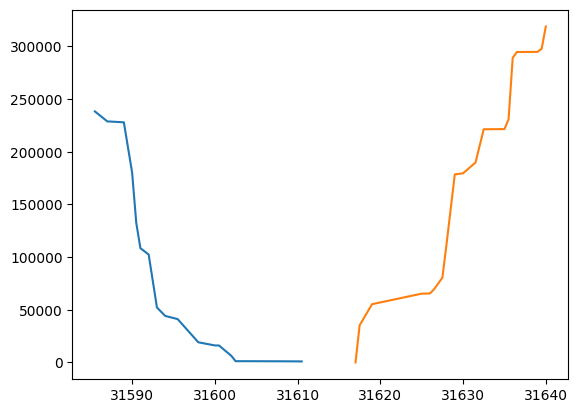

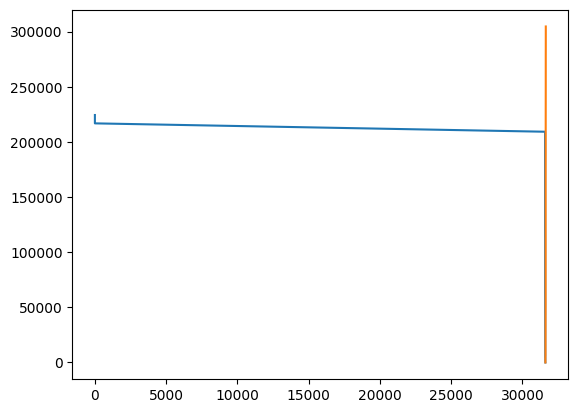

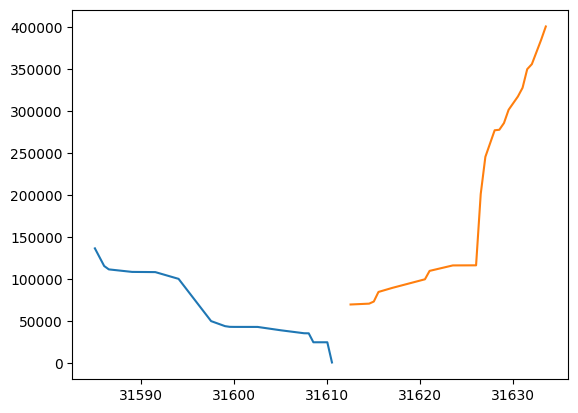

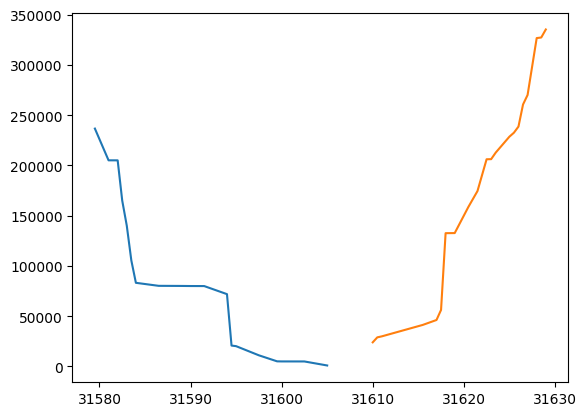

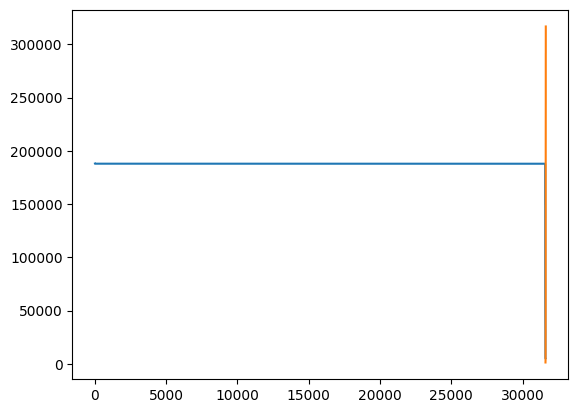

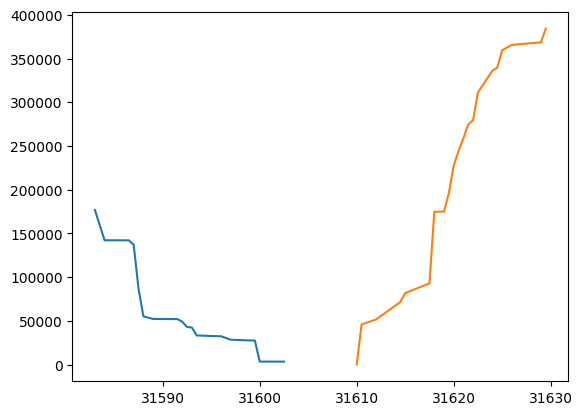

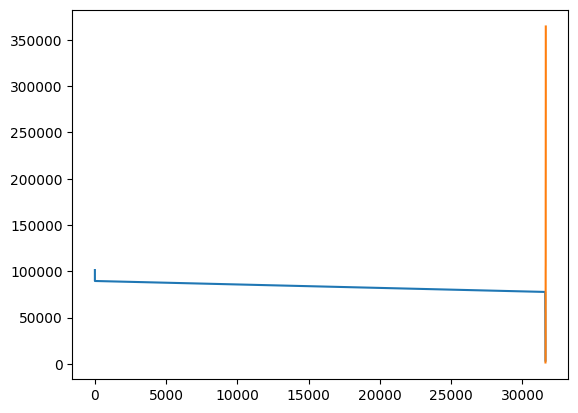

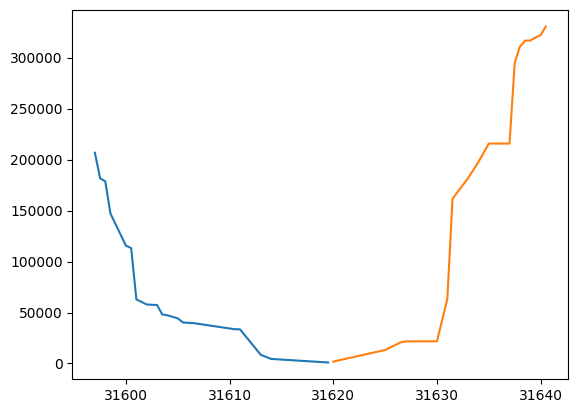

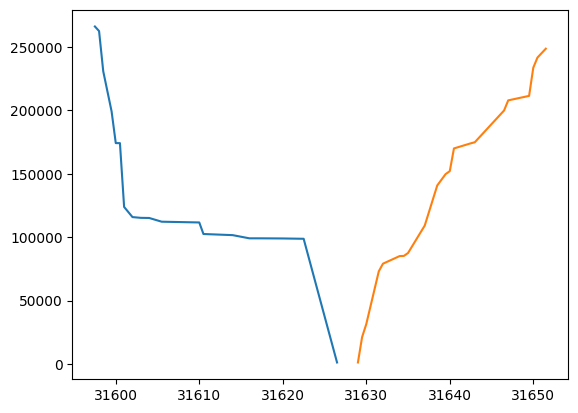

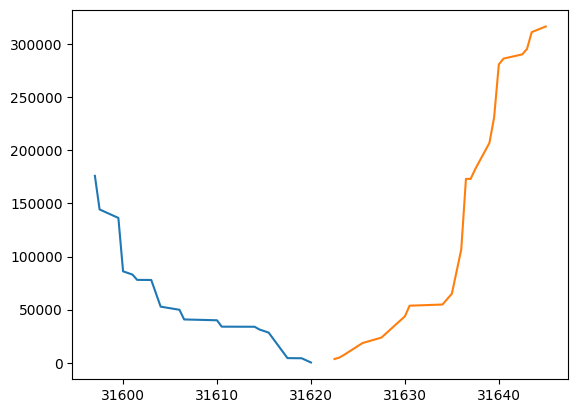

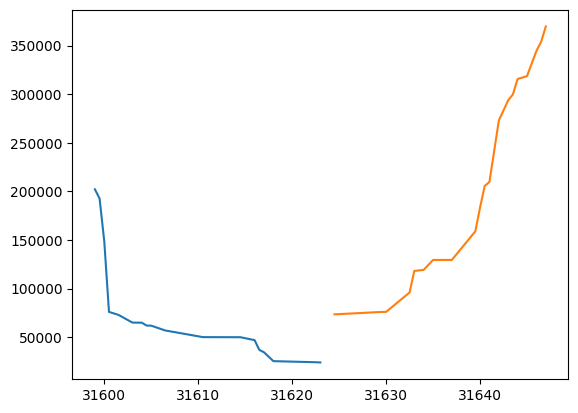

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = get_files("BTC-PERPETUAL")
for t in range(100):
    test = df.iloc[t].to_numpy()
    a = test.reshape(-2,2).transpose()
    bids = a[:,a[0] <= np.median(a[0])]
    asks = a[:, a[0] > np.median(a[0])]
    bids = bids[:, bids[0] != 0]
    asks = asks[:, asks[0] != 0]
    plt.plot(bids[0], np.cumsum(bids[1]))
    plt.plot(asks[0], np.cumsum(asks[1]))
    plt.draw()
    plt.pause(.01)
    plt.clf()